In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the dataset
bigSales = pd.read_csv("Train_BigMart.csv")
df = bigSales
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
#Take some insights of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

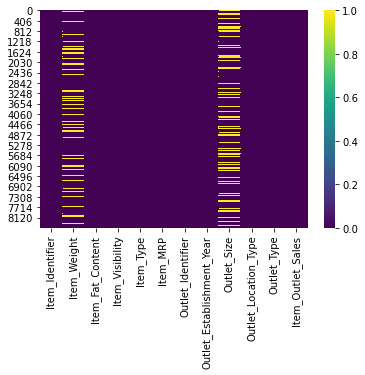

In [6]:
#Analyze the column having null values
sns.heatmap(df.isnull(),cmap="viridis")

In [7]:
#Find all categorical attributes
category_col =[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        category_col.append(i)
category_col.remove('Item_Identifier')
category_col.remove('Outlet_Identifier')
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg","Regular")
for i in category_col:
    print(i)    
    print(df[i].value_counts())
    print()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64



In [8]:
#Find and handle null values
item_weight_mean = df.pivot_table(values="Item_Weight",index="Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [9]:
item_weight_bool  = df["Item_Weight"].isnull()
item_weight_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [10]:
for i,item in enumerate(df["Item_Identifier"]):    
    if item_weight_bool[i]:        
        if item in item_weight_mean.index:            
            df.loc[i,"Item_Weight"]=item_weight_mean.loc[item,"Item_Weight"]
        else:           
            df.loc[i,"Item_Weight"]=np.mean(df["Item_Weight"])

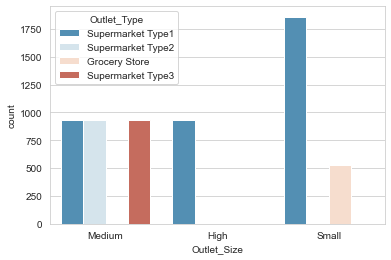

In [11]:
# outlet_size_mode = df.pivot_table(values="Outlet_Size",columns="Outlet_Type")
sns.set_style("whitegrid")
sns.countplot(x="Outlet_Size",hue="Outlet_Type",data=df,palette="RdBu_r")

In [12]:
outlet_size_mode = df.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
outlet_size_bool = df["Outlet_Size"].isnull()
outlet_size_bool

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [14]:
df.loc[outlet_size_bool,"Outlet_Size"] = df.loc[outlet_size_bool,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])

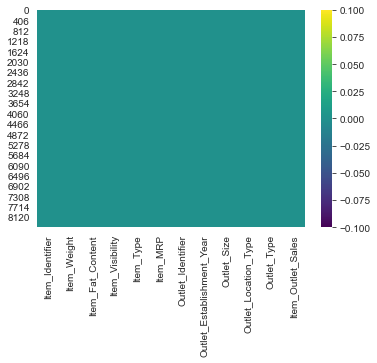

In [15]:
sns.heatmap(df.isnull(),cmap="viridis")

In [16]:
print(df['Item_Visibility']==0) #here some item visiblity are 0
df['Item_Visibility']= df['Item_Visibility'].replace([0],df['Item_Visibility'].mean()) # replaced with mean

0       False
1       False
2       False
3        True
4        True
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Visibility, Length: 8523, dtype: bool


In [17]:
df["New_Item_Type"] = df["Item_Identifier"].apply(lambda x:x[:2])
df["New_Item_Type"].value_counts()
df["New_Item_Type"]=df["New_Item_Type"].replace({"FD":"Food","NC":"Non Consumable","DR":"Drink"})
item_fat_bool = (df["New_Item_Type"]=="Non Consumable")
indi=np.where(item_fat_bool)
df.loc[item_fat_bool,"Item_Fat_Content"]="Non edible"

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumable


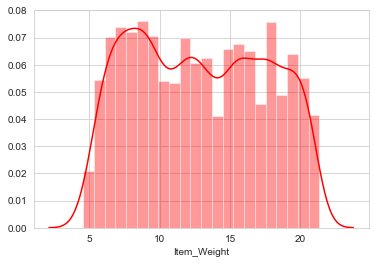

In [19]:
sns.distplot(df["Item_Weight"],color="red")

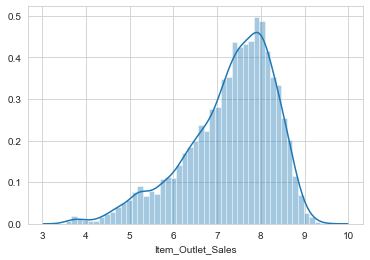

In [20]:
df["Item_Outlet_Sales"]=np.log(1+df["Item_Outlet_Sales"])
sns.distplot(df["Item_Outlet_Sales"])

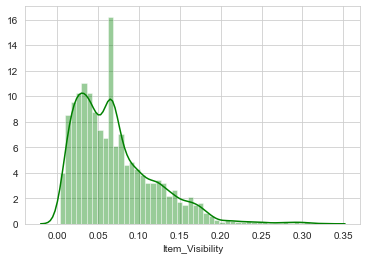

In [21]:
sns.distplot(df["Item_Visibility"],color="green")

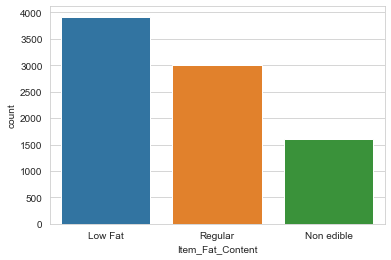

In [22]:
sns.set_style("whitegrid")
sns.countplot(df["Item_Fat_Content"])

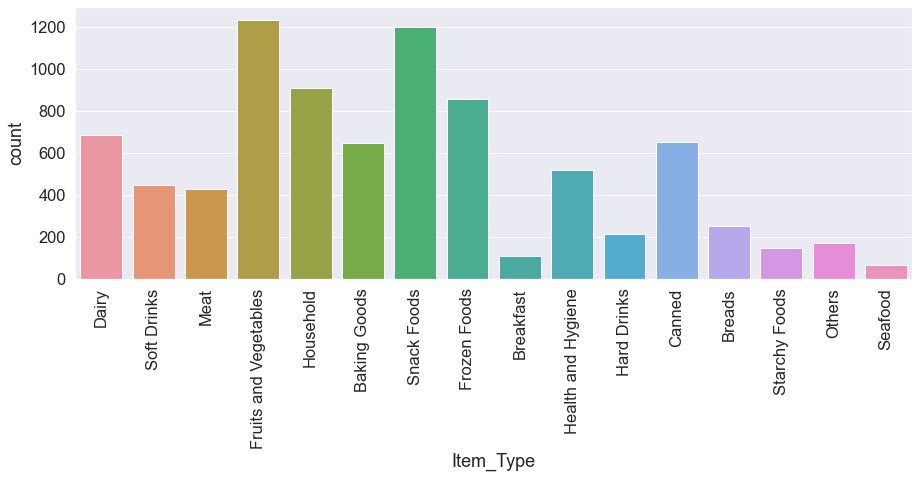

In [23]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5)
label = df["Item_Type"].unique()
plot = sns.countplot(df["Item_Type"])
plot.set_xticklabels(labels=label,rotation=90)
plt.show()

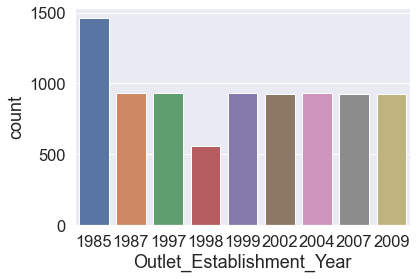

In [24]:
sns.countplot(df["Outlet_Establishment_Year"])

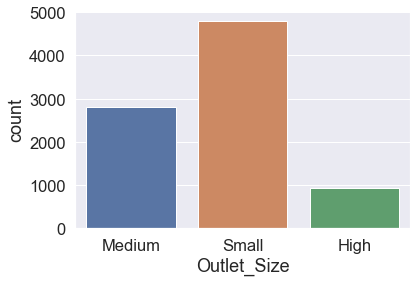

In [25]:
sns.countplot(df["Outlet_Size"])

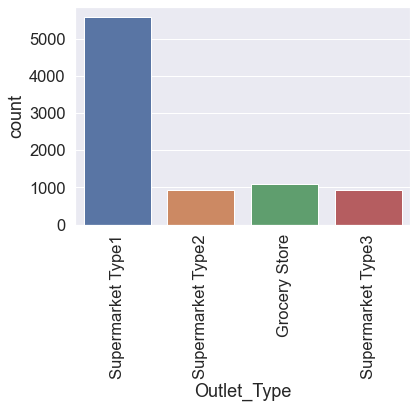

In [26]:
label = df["Outlet_Type"].unique()
plot=sns.countplot(df["Outlet_Type"])
plot.set_xticklabels(labels=label,rotation=90)
plt.show()

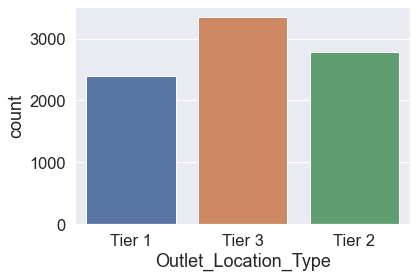

In [27]:
sns.countplot(df["Outlet_Location_Type"])

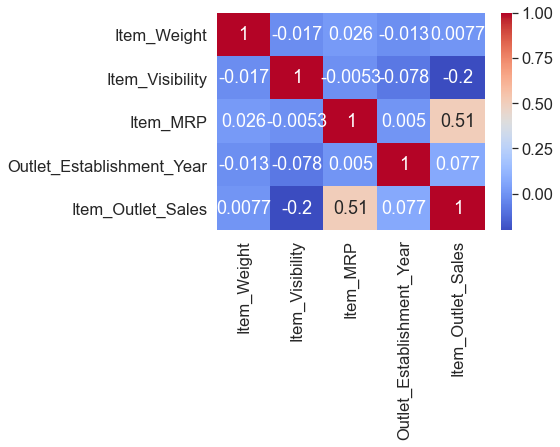

In [28]:
#  Correlation matrix
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap="coolwarm")

In [29]:
#encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Type']=le.fit_transform(df["Item_Type"])
df=pd.get_dummies(df,columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],drop_first=True)
df=df.drop(columns=["Item_Identifier","Outlet_Identifier"])
x=df.drop(columns=["Item_Outlet_Sales"],axis=1)
y=(df["Item_Outlet_Sales"].values.reshape(-1,1))
df=df.drop("Item_Outlet_Sales",axis=1)
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Non edible,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Food,New_Item_Type_Non Consumable
0,9.30,0.016047,4,249.8092,1999,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,2009,0,1,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,1999,0,0,1,0,0,0,1,0,0,1,0
3,19.20,0.066132,6,182.0950,1998,0,1,0,1,0,1,0,0,0,1,0
4,8.93,0.066132,9,53.8614,1987,1,0,0,0,0,1,1,0,0,0,1


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split
def train(model,x,y):    
    x_train,x_test,y_train,y_test = split(x,y,test_size=0.30)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model report")
    print("MSE:",mean_squared_error(y_test,pred))
    print("cv score:",cv_score)
    return x_train
from sklearn.linear_model import Lasso
model =Lasso()
x_train=train(model,x,y)
# coef = pd.Series(model.coef_, x_train.columns).sort_values()
# coef.plot(kind='bar', title="Model Coefficients")

Model report
MSE: 0.740008749679317
cv score: 0.7741624606860763
